In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# utility functions

def plot_stem(df, column):
    
    # 计算给定列的值的频率，并将其标准化为概率质量函数 (PMF)
    # value_counts(): 统计了每个唯一值的出现次数
    # to_frame(): 将 Pandas Series 转换为 DataFrame
    # sort_index(): 对 DataFrame 按索引进行升序排序
    pmf_df = df[column].value_counts().to_frame().sort_index() / len(df)

    fig, ax = plt.subplots()
    
    # 计算平均值
    # 使用每个唯一值乘以对应的概率，然后求和
    centroid = np.sum(pmf_df[column].astype(float) * pmf_df.index)
    # 绘制棉棒图
    plt.stem(pmf_df.index, pmf_df[column].astype(float))
    # 绘制平均值
    plt.vlines(centroid, 0, 0.3, colors='r', linestyles='--')
    plt.ylim(0, 0.3)
    plt.xlim(-5, 40)
    plt.ylabel('Probability, PMF')
    plt.title(column + '; average = ' + '{0:.2f}'.format(centroid))


def plot_contour(XX1, XX2, df, column, XX1_fine, XX2_fine, YY):
    
    # 展开为一维数组
    XX1_ = XX1.ravel()
    XX2_ = XX2.ravel()

    # df[column].unique() 用于获取数据框 df 中指定列 column 的唯一值（去重）
    # np.sort() 函数对这些唯一值进行排序，得到一个有序的数组。
    levels = np.sort(df[column].unique())
    print(list(levels))  # test only

    fig, ax = plt.subplots()
    plt.scatter(XX1_, XX2_)
    CS = plt.contour(XX1_fine, XX2_fine,
                     YY,
                     levels=levels,
                     cmap='rainbow')

    # plt.contour(XX1_fine, XX2_fine,
    #             YY,
    #             levels=levels,
    #             cmap='rainbow')
    
    # 在轮廓线上添加标签
    ax.clabel(CS, inline=True,
              fontsize=12,
              fmt="%.2f")

    ax.set_aspect('equal', adjustable='box')
    plt.grid()
    plt.xlim(1 - 0.5, 6 + 0.5)
    plt.ylim(1 - 0.5, 6 + 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis="y", direction='in', length=8)
    ax.tick_params(axis="x", direction='in', length=8)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.title(column)



[1, 2, 3, 4, 5, 6]
[1, 4, 9, 16, 25, 36]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
[-2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 30, 36]
[0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.4, 0.5, 0.6, 0.6666666666666666, 0.75, 0.8, 0.8333333333333334, 1.0, 1.2, 1.25, 1.3333333333333333, 1.5, 1.6666666666666667, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0]
[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0.5, 2.5, 4.5, 6.5, 8.5, 12.5]


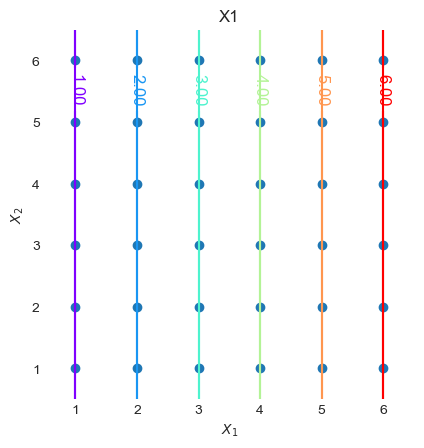

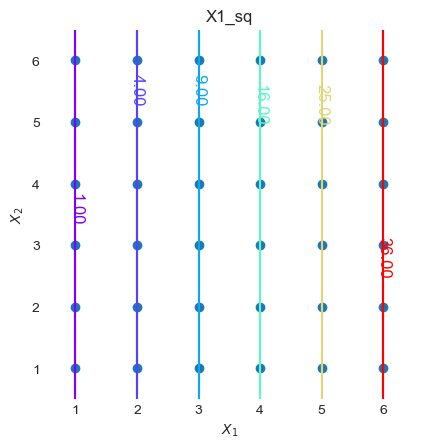

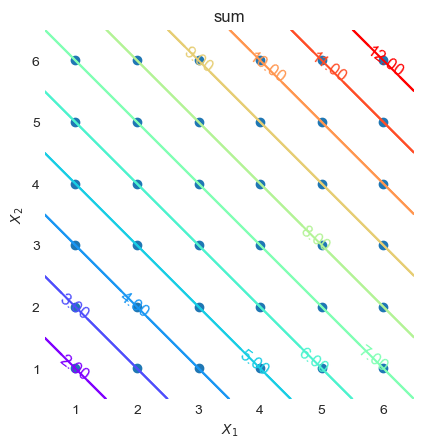

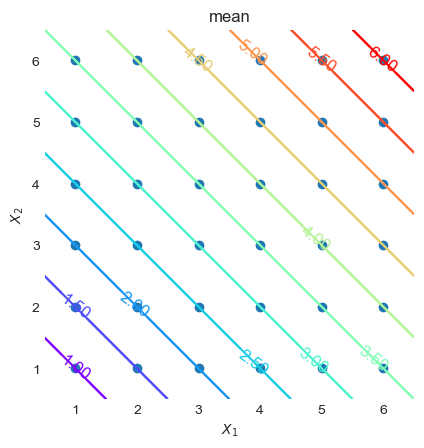

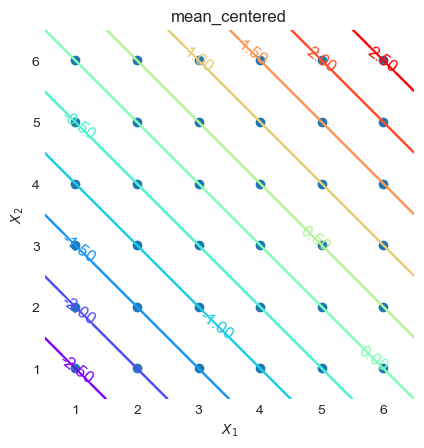

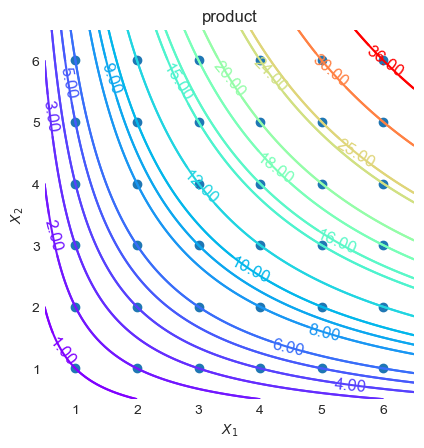

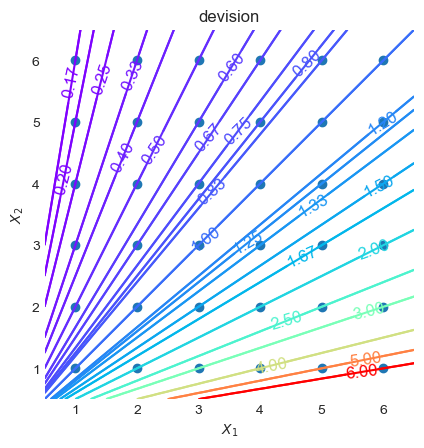

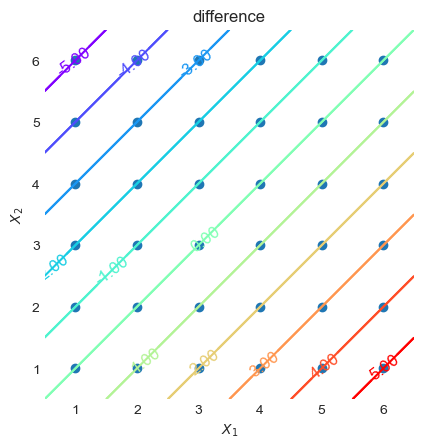

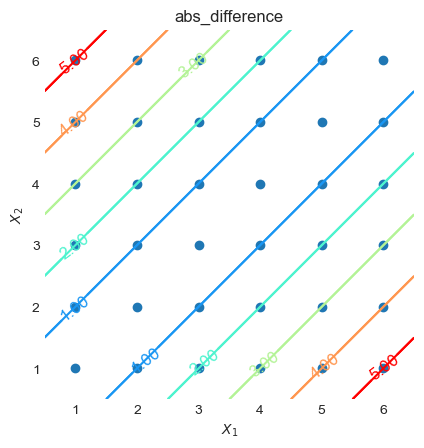

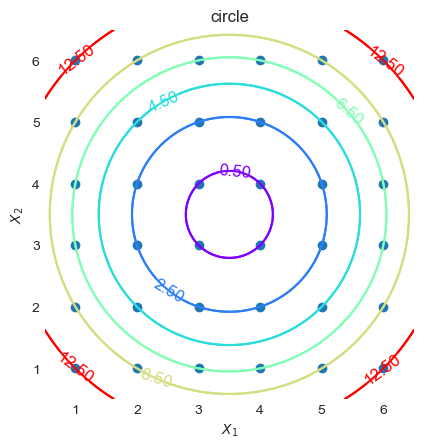

In [12]:
X1_array = np.arange(1, 6 + 1)
X2_array = np.arange(1, 6 + 1)

X1_fine_array = np.linspace(0.5, 6.5, 100)
X2_fine_array = np.linspace(0.5, 6.5, 100)

# 生成坐标点
XX1, XX2 = np.meshgrid(X1_array, X2_array)
XX1_fine, XX2_fine = np.meshgrid(X1_fine_array, X2_fine_array)

# 展开成一维数组
XX1_ = XX1.ravel()
XX2_ = XX2.ravel()

# column_stack 按列组合到一起
df = pd.DataFrame(np.column_stack((XX1_, XX2_)), columns=['X1', 'X2'])

df['X1_sq'] = df['X1']

YY_X1_only = XX1_fine

plot_contour(XX1, XX2, df, 'X1', XX1_fine, XX2_fine, YY_X1_only)

# plot_stem(df, 'X1')

df['X1_sq'] = df['X1'] ** 2

YY_X1_sq = XX1_fine ** 2

plot_contour(XX1, XX2, df, 'X1_sq', XX1_fine, XX2_fine, YY_X1_sq)

# plot_stem(df, 'X1_sq')

df['sum'] = (df['X1'] + df['X2'])

YY_sum = XX1_fine + XX2_fine

plot_contour(XX1, XX2, df, 'sum', XX1_fine, XX2_fine, YY_sum)

# plot_stem(df, 'sum')

df['mean'] = (df['X1'] + df['X2']) / 2

YY_mean = (XX1_fine + XX2_fine) / 2

plot_contour(XX1, XX2, df, 'mean', XX1_fine, XX2_fine, YY_mean)

# plot_stem(df, 'mean')

df['mean_centered'] = (df['X1'] + df['X2'] - 7) / 2

YY_mean_centered = (XX1_fine + XX2_fine - 7) / 2

plot_contour(XX1, XX2, df, 'mean_centered', XX1_fine, XX2_fine, YY_mean_centered)

# plot_stem(df, 'mean_centered')

df['product'] = df['X1'] * df['X2']

YY_product = XX1_fine * XX2_fine

plot_contour(XX1, XX2, df, 'product', XX1_fine, XX2_fine, YY_product)

# plot_stem(df, 'product')

df['devision'] = df['X1'] / df['X2']

YY_devision = XX1_fine / XX2_fine

plot_contour(XX1, XX2, df, 'devision', XX1_fine, XX2_fine, YY_devision)

# plot_stem(df, 'devision')

df['difference'] = df['X1'] - df['X2']

YY_difference = XX1_fine - XX2_fine

plot_contour(XX1, XX2, df, 'difference', XX1_fine, XX2_fine, YY_difference)

# plot_stem(df, 'difference')

df['abs_difference'] = np.abs(df['X1'] - df['X2'])

YY_abs_difference = np.abs(XX1_fine - XX2_fine)

plot_contour(XX1, XX2, df, 'abs_difference', XX1_fine, XX2_fine, YY_abs_difference)

# plot_stem(df, 'abs_difference')

df['circle'] = (df['X1'] - 3.5) ** 2 + (df['X2'] - 3.5) ** 2

YY_circle = (XX1_fine - 3.5) ** 2 + (XX2_fine - 3.5) ** 2

plot_contour(XX1, XX2, df, 'circle', XX1_fine, XX2_fine, YY_circle)

# plot_stem(df, 'circle')

[5.  4.5 5.5 6.  7.  6.5 7.5 8. ]
8
[3.5 3.  4.  4.5 2.5 2. ]
6


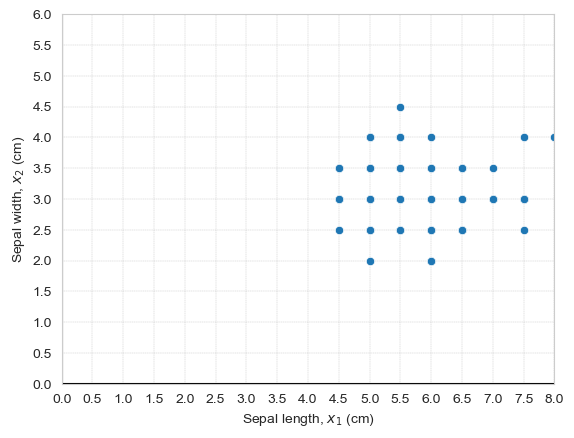

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

pd.options.mode.chained_assignment = None  # default='warn'

# Load the iris data
X_df = sns.load_dataset("iris", cache=False, data_home='./data/seaborn_data')
# cache=False 参数确保每次调用 load_dataset 时都重新加载数据而不使用缓存

def heatmap_sum(data, i_array, j_array, title, vmin, vmax, cmap):
    
    fig, ax = plt.subplots(figsize=(10, 10))

    ax = sns.heatmap(data, cmap=cmap,  #'YlGnBu', # YlGnBu
                     cbar_kws={"orientation": "horizontal"},
                     yticklabels=i_array, xticklabels=j_array,
                     ax=ax, annot=True,
                     linewidths=0.25, linecolor='grey',
                     vmin=vmin, vmax=vmax)

    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')

    ax.set_aspect("equal")
    plt.title(title)
    plt.yticks(rotation=0)


# 舍入
X_df.sepal_length = round(X_df.sepal_length * 2) / 2
X_df.sepal_width = round(X_df.sepal_width * 2) / 2

print(X_df.sepal_length.unique())
sepal_length_array = X_df.sepal_length.unique()
sepal_length_array = np.sort(sepal_length_array)
# 使用 nunique() 方法返回唯一值的数量
print(X_df.sepal_length.nunique())

print(X_df.sepal_width.unique())
sepal_width_array = X_df.sepal_width.unique()
sepal_width_array = -np.sort(-sepal_width_array)
# sepal_width_array = np.flip(sepal_width_array)
print(X_df.sepal_width.nunique())

fig, ax = plt.subplots()

# scatter plot of iris data
ax = sns.scatterplot(data=X_df, x='sepal_length', y='sepal_width')

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_xticks(np.arange(0, 8 + 1, step=0.5))
ax.set_yticks(np.arange(0, 6 + 1, step=0.5))
ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7, 0.7, 0.7])
ax.set_xbound(lower=0, upper=8)
ax.set_ybound(lower=0, upper=6)


                          count
sepal_length sepal_width       
4.5          2.5              1
             3.0              8
             3.5              2
5.0          2.0              1
             2.5              5
             3.0              8
             3.5             16
             4.0              4
5.5          2.5              9
             3.0              9
             3.5              5
             4.0              4
             4.5              1
6.0          2.0              3
             2.5              7
             3.0             13
             3.5              2
             4.0              1
6.5          2.5              6
             3.0             20
             3.5              5
7.0          3.0             11
             3.5              1
7.5          2.5              1
             3.0              5
             4.0              1
8.0          4.0              1
             count                                       
sepal_length  

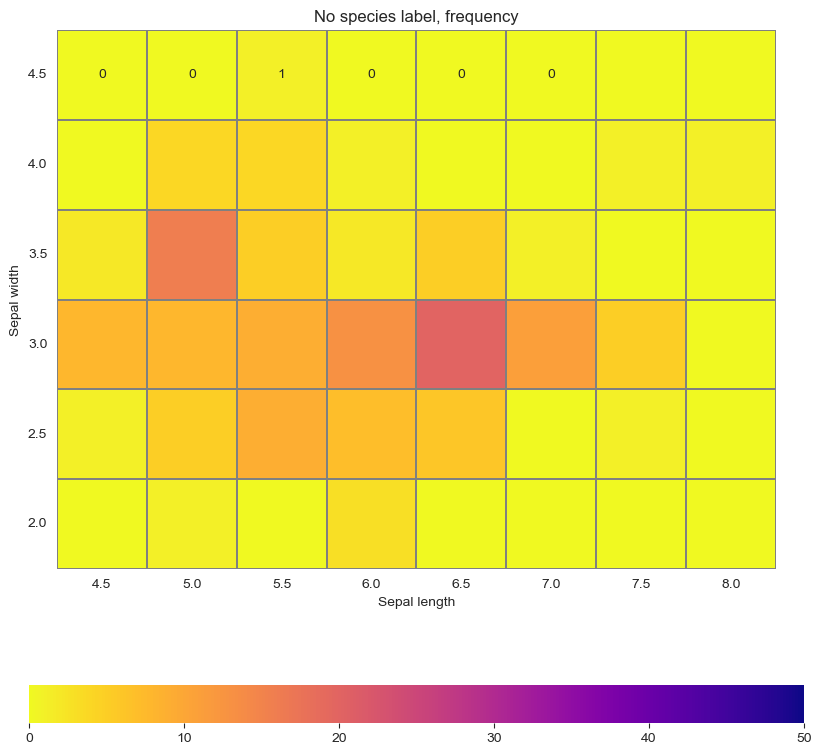

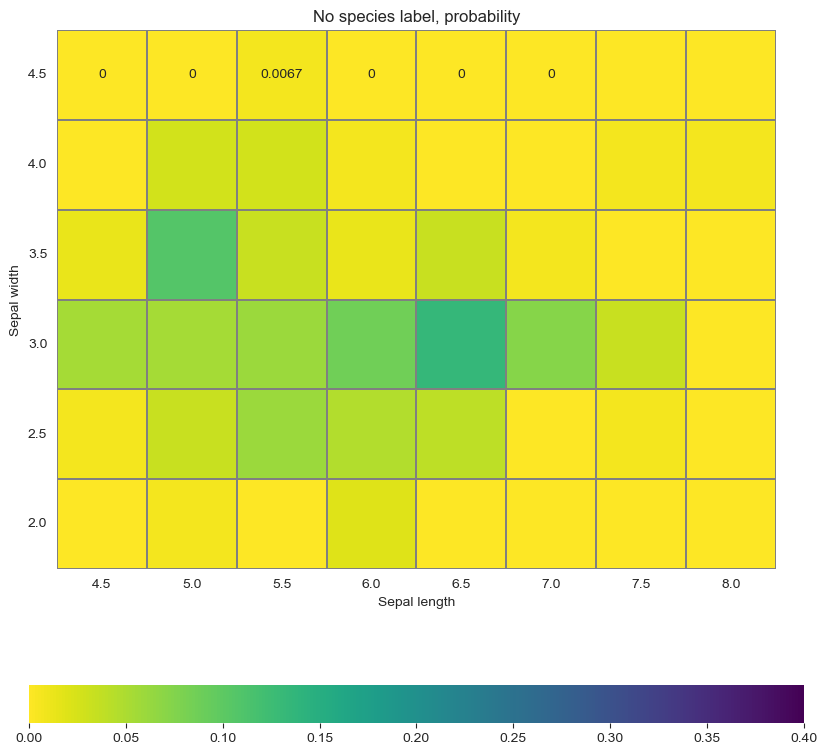

In [26]:
# 生成频率矩阵

X_df_12 = X_df[['sepal_length', 'sepal_width']]
# 添加一个新的列
X_df_12['count'] = 1
# unstack(level=0) 用于将数据框中的某个层级的多级索引转换为列
frequency_matrix = X_df_12.groupby(['sepal_length', 'sepal_width']).count()
print(frequency_matrix)
frequency_matrix = frequency_matrix.unstack(level=0)
print(frequency_matrix)

# 移除频率矩阵的列级别的标签
frequency_matrix.columns = frequency_matrix.columns.droplevel(0)
print(frequency_matrix)

# 缺失值用 0 填充
frequency_matrix = frequency_matrix.fillna(0)
frequency_matrix = frequency_matrix.iloc[::-1]

probability_matrix = frequency_matrix / 150
# frequency_matrix.to_excel('C:\\Users\\james\\Desktop\\' + 'frequency_matrix.xlsx')


title = 'No species label, frequency'
heatmap_sum(frequency_matrix, sepal_width_array, sepal_length_array, title, 0, 50, 'plasma_r')

title = 'No species label, probability'
heatmap_sum(probability_matrix, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r')

[[11. 34. 28. 26. 31. 12.  7.  1.]]
[[0.07333333 0.22666667 0.18666667 0.17333333 0.20666667 0.08
  0.04666667 0.00666667]]


(array([[5.83666667]]),
 5.836666666666667,
 array([[0.67498889]]),
 0.6749888888888883)

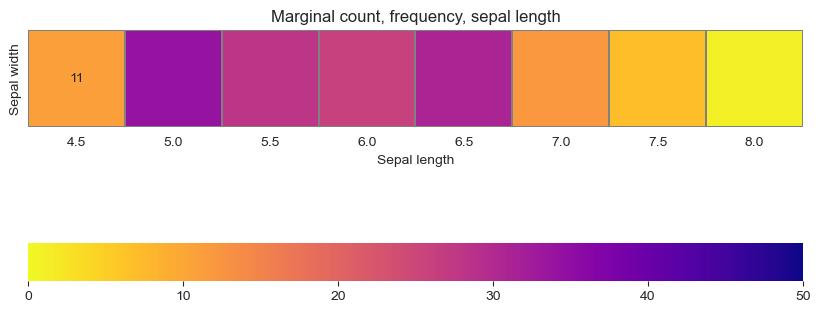

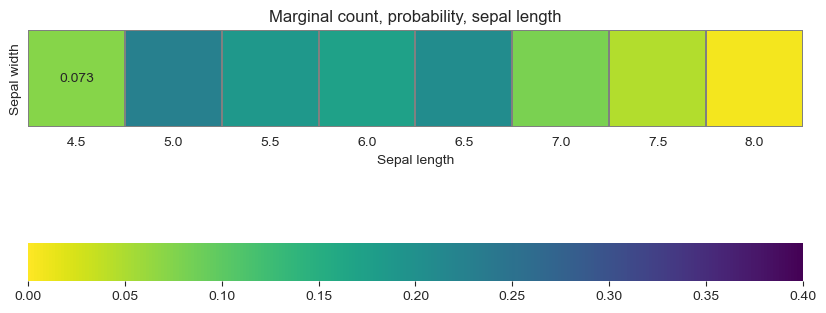

In [30]:
freq_sepal_length = frequency_matrix.sum(axis=0).to_numpy().reshape((1, -1))
print(freq_sepal_length)
prob_sepal_length = probability_matrix.sum(axis=0).to_numpy().reshape((1, -1))
print(prob_sepal_length)

title = 'Marginal count, frequency, sepal length'
heatmap_sum(freq_sepal_length, [], sepal_length_array, title, 0, 50, 'plasma_r')

title = 'Marginal count, probability, sepal length'
heatmap_sum(prob_sepal_length, [], sepal_length_array, title, 0, 0.4, 'viridis_r')

# 平均值
E_X1 = prob_sepal_length @ sepal_length_array.reshape(-1, 1)

E_X1_ = X_df['sepal_length'].mean()  # test only

E_X1_sq = prob_sepal_length @ (sepal_length_array ** 2).reshape(-1, 1)

# 方差
var_X1 = E_X1_sq - E_X1 ** 2

var_X1_ = X_df['sepal_length'].var() * 149 / 150  # test only

E_X1, E_X1_, var_X1, var_X1_


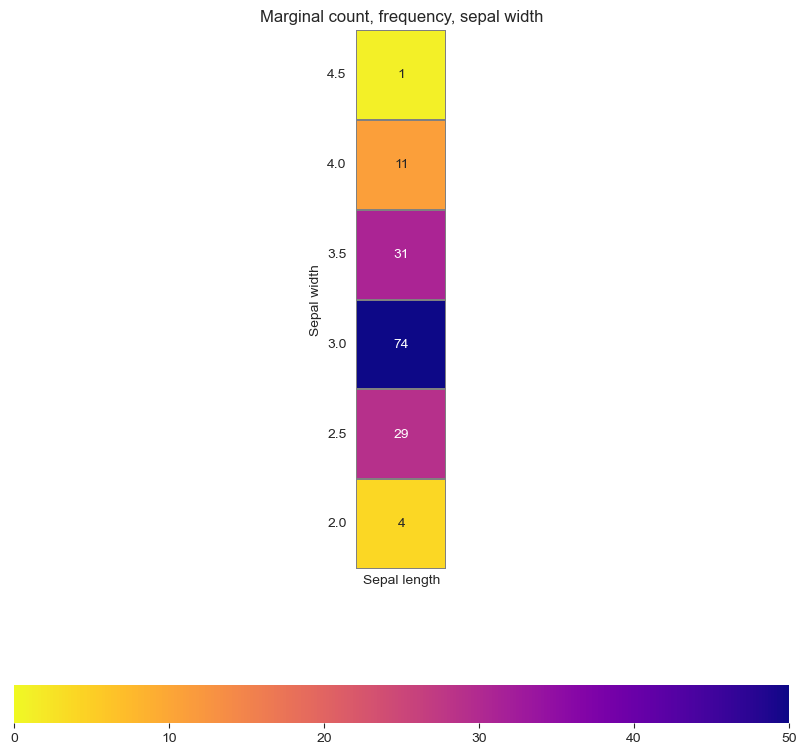

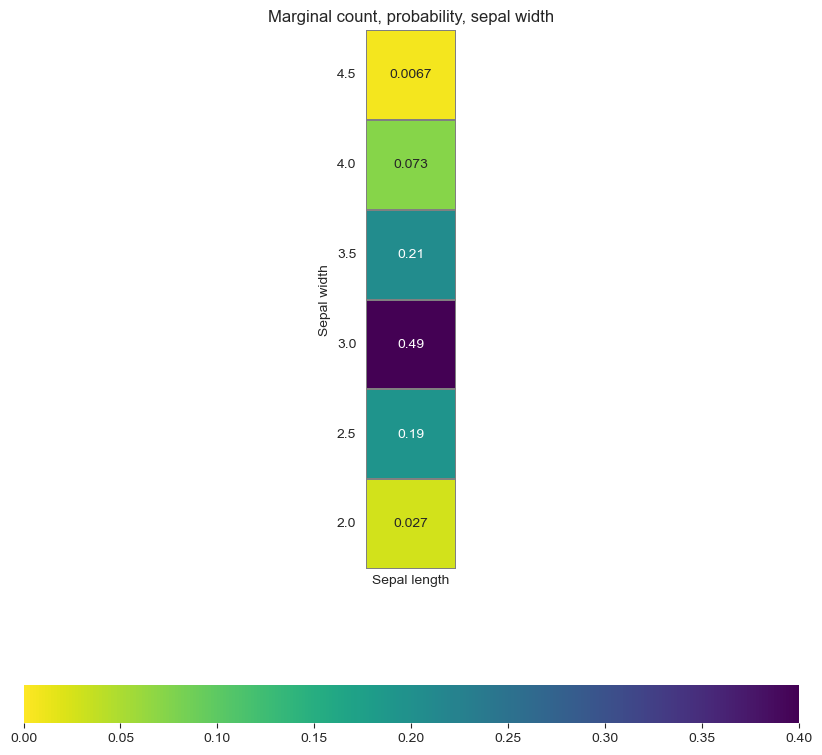

In [32]:
freq_sepal_width = frequency_matrix.sum(axis=1).to_numpy().reshape((-1, 1))
prob_sepal_width = probability_matrix.sum(axis=1).to_numpy().reshape((-1, 1))

title = 'Marginal count, frequency, sepal width'
heatmap_sum(freq_sepal_width, sepal_width_array, [], title, 0, 50, 'plasma_r')

title = 'Marginal count, probability, sepal width'
heatmap_sum(prob_sepal_width, sepal_width_array, [], title, 0, 0.4, 'viridis_r')


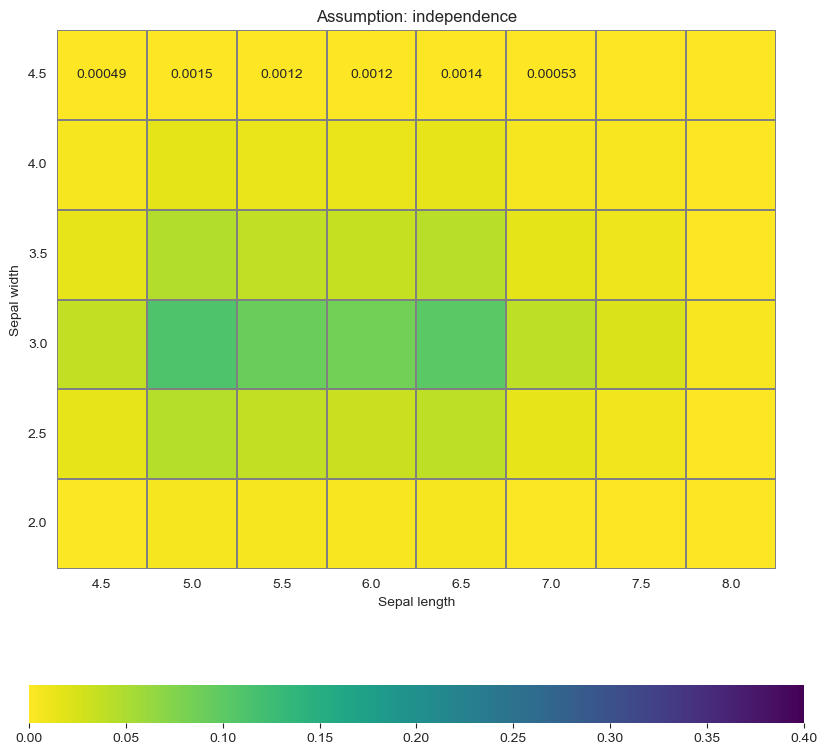

In [31]:
E_X2 = sepal_width_array.reshape(1, -1) @ prob_sepal_width

E_X2_ = X_df['sepal_width'].mean()  # test only

title = 'Assumption: independence'
# joint probability
heatmap_sum(prob_sepal_width @ prob_sepal_length, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r')


sepal_length       4.5       5.0       5.5       6.0       6.5       7.0  \
sepal_width                                                                
4.5           0.000000  0.000000  0.006667  0.000000  0.000000  0.000000   
4.0           0.000000  0.026667  0.026667  0.006667  0.000000  0.000000   
3.5           0.013333  0.106667  0.033333  0.013333  0.033333  0.006667   
3.0           0.053333  0.053333  0.060000  0.086667  0.133333  0.073333   
2.5           0.006667  0.033333  0.060000  0.046667  0.040000  0.000000   
2.0           0.000000  0.006667  0.000000  0.020000  0.000000  0.000000   

sepal_length       7.5       8.0  
sepal_width                       
4.5           0.000000  0.000000  
4.0           0.006667  0.006667  
3.5           0.000000  0.000000  
3.0           0.033333  0.000000  
2.5           0.006667  0.000000  
2.0           0.000000  0.000000  
                  5.0
sepal_width          
4.5          0.000000
4.0          0.117647
3.5          0.470588
3

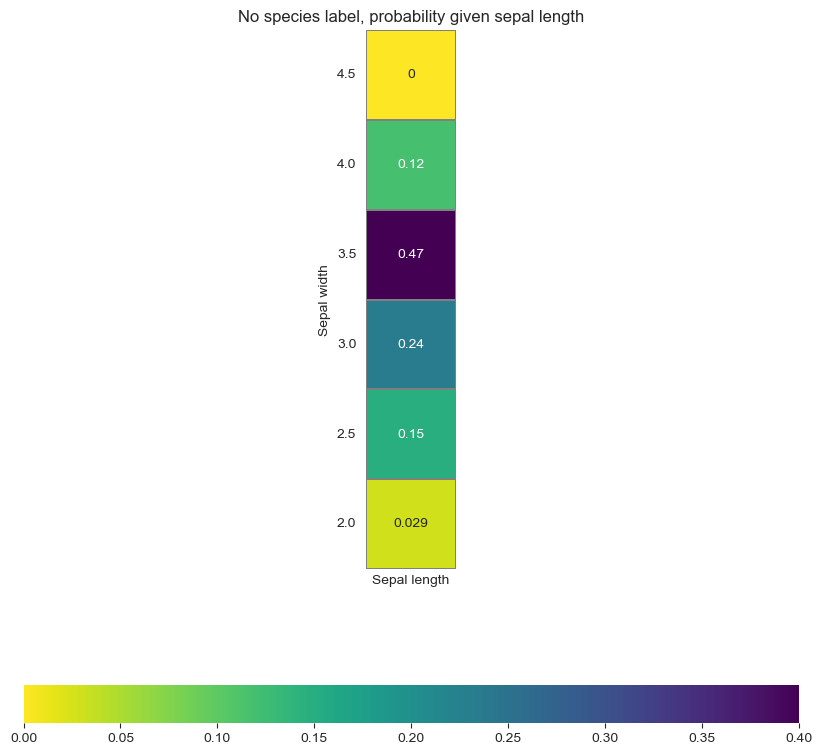

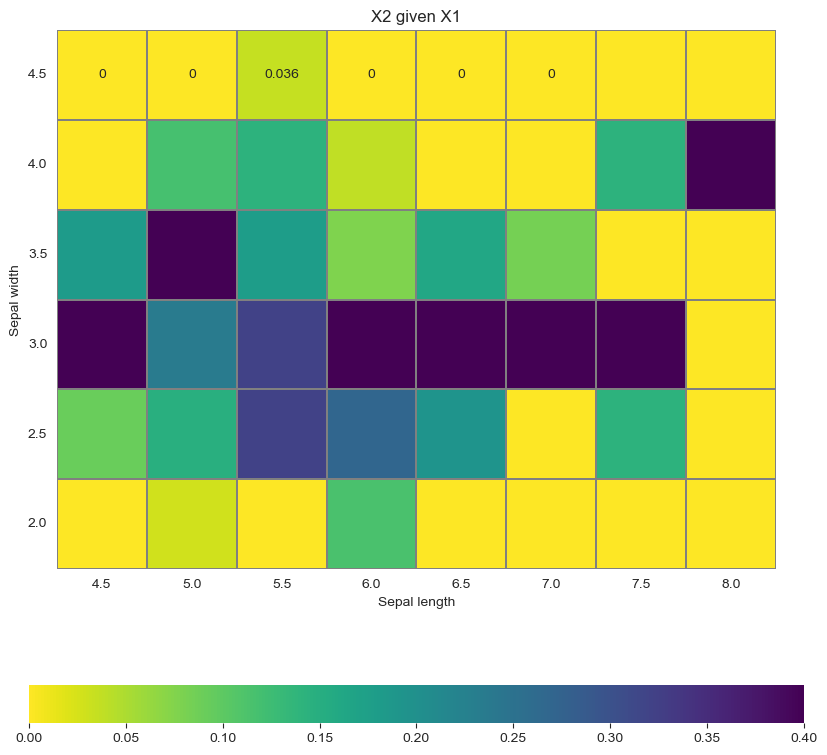

In [36]:
# 条件概率
print(probability_matrix)
given_sepal_length = 5

prob_given_length = probability_matrix[given_sepal_length]
prob_given_length = prob_given_length / prob_given_length.sum()
prob_given_length = prob_given_length.to_frame()
print(prob_given_length)

title = 'No species label, probability given sepal length'
heatmap_sum(prob_given_length, sepal_width_array, [], title, 0, 0.4, 'viridis_r')

probability_matrix_ = probability_matrix.to_numpy()

conditional_X2_given_X1_matrix = probability_matrix_ / (np.ones((6, 1)) @ np.array([probability_matrix_.sum(axis=0)]))

title = 'X2 given X1'
heatmap_sum(conditional_X2_given_X1_matrix, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r')



sepal_length       4.5       5.0       5.5       6.0       6.5       7.0  \
sepal_width                                                                
4.5           0.000000  0.000000  0.006667  0.000000  0.000000  0.000000   
4.0           0.000000  0.026667  0.026667  0.006667  0.000000  0.000000   
3.5           0.013333  0.106667  0.033333  0.013333  0.033333  0.006667   
3.0           0.053333  0.053333  0.060000  0.086667  0.133333  0.073333   
2.5           0.006667  0.033333  0.060000  0.046667  0.040000  0.000000   
2.0           0.000000  0.006667  0.000000  0.020000  0.000000  0.000000   

sepal_length       7.5       8.0  
sepal_width                       
4.5           0.000000  0.000000  
4.0           0.006667  0.006667  
3.5           0.000000  0.000000  
3.0           0.033333  0.000000  
2.5           0.006667  0.000000  
2.0           0.000000  0.000000  
sepal_length       4.5       5.0       5.5       6.0       6.5  7.0       7.5  \
2.5           0.034483  0.1724

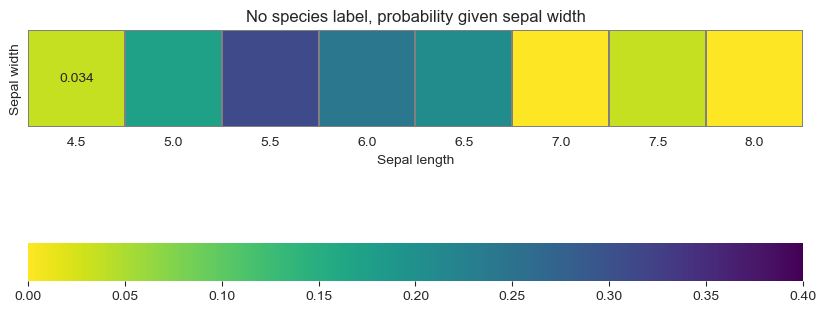

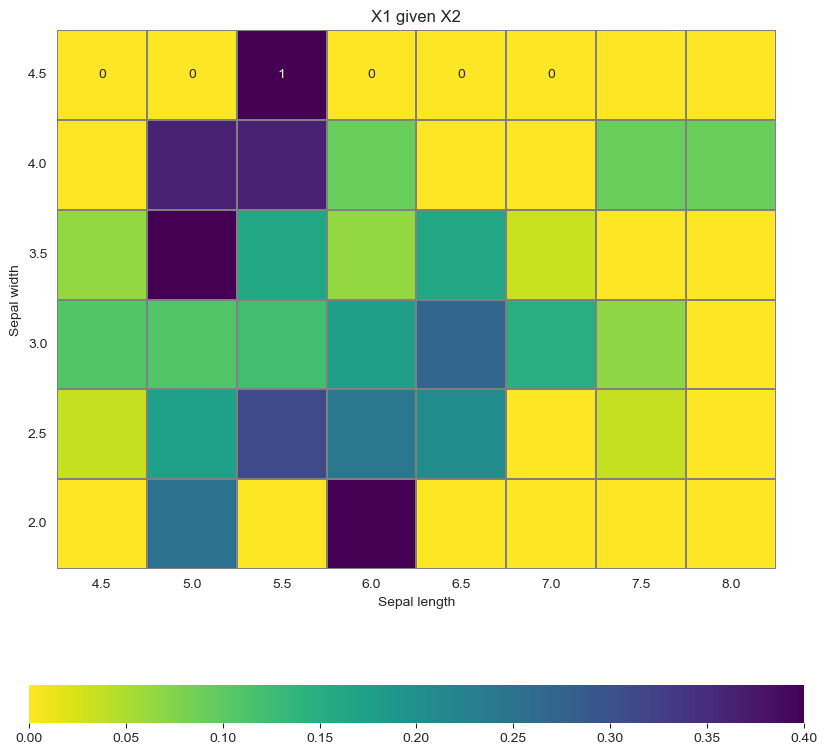

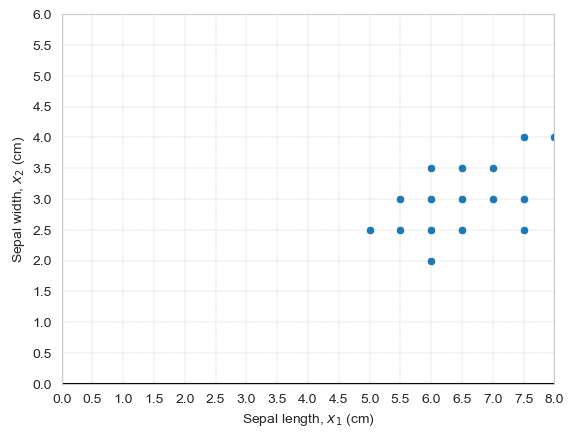

In [37]:
print(probability_matrix)

given_sepal_width = 2.5

prob_given_width = probability_matrix.loc[given_sepal_width, :]
prob_given_width = prob_given_width / prob_given_width.sum()
prob_given_width = prob_given_width.to_frame().T
print(prob_given_width)

title = 'No species label, probability given sepal width'
heatmap_sum(prob_given_width, [], sepal_length_array, title, 0, 0.4, 'viridis_r')

conditional_X1_given_X2_matrix = probability_matrix_ / (
            probability_matrix_.sum(axis=1).reshape(-1, 1) @ np.ones((1, 8)))

title = 'X1 given X2'
heatmap_sum(conditional_X1_given_X2_matrix, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r')


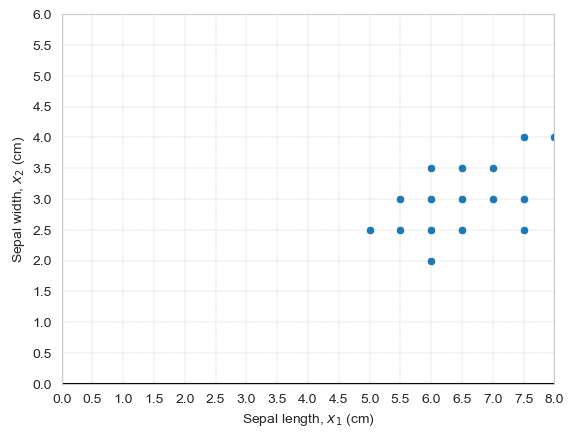

In [38]:
Given_Y = 'virginica'  # 'setosa', 'versicolor', 'virginica'

fig, ax = plt.subplots()

# scatter plot of iris data
ax = sns.scatterplot(data=X_df.loc[X_df.species == Given_Y], x='sepal_length', y='sepal_width')

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_xticks(np.arange(0, 8 + 1, step=0.5))
ax.set_yticks(np.arange(0, 6 + 1, step=0.5))
ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7, 0.7, 0.7])
ax.set_xbound(lower=0, upper=8)
ax.set_ybound(lower=0, upper=6)

     sepal_length  sepal_width  count
0             5.0          3.5    NaN
1             5.0          3.0    NaN
2             4.5          3.0    NaN
3             4.5          3.0    NaN
4             5.0          3.5    NaN
..            ...          ...    ...
145           6.5          3.0    1.0
146           6.5          2.5    1.0
147           6.5          3.0    1.0
148           6.0          3.5    1.0
149           6.0          3.0    1.0

[150 rows x 3 columns]
                          count
sepal_length sepal_width       
4.5          2.5              0
             3.0              0
             3.5              0
5.0          2.0              0
             2.5              1
             3.0              0
             3.5              0
             4.0              0
5.5          2.5              1
             3.0              1
             3.5              0
             4.0              0
             4.5              0
6.0          2.0              1
        

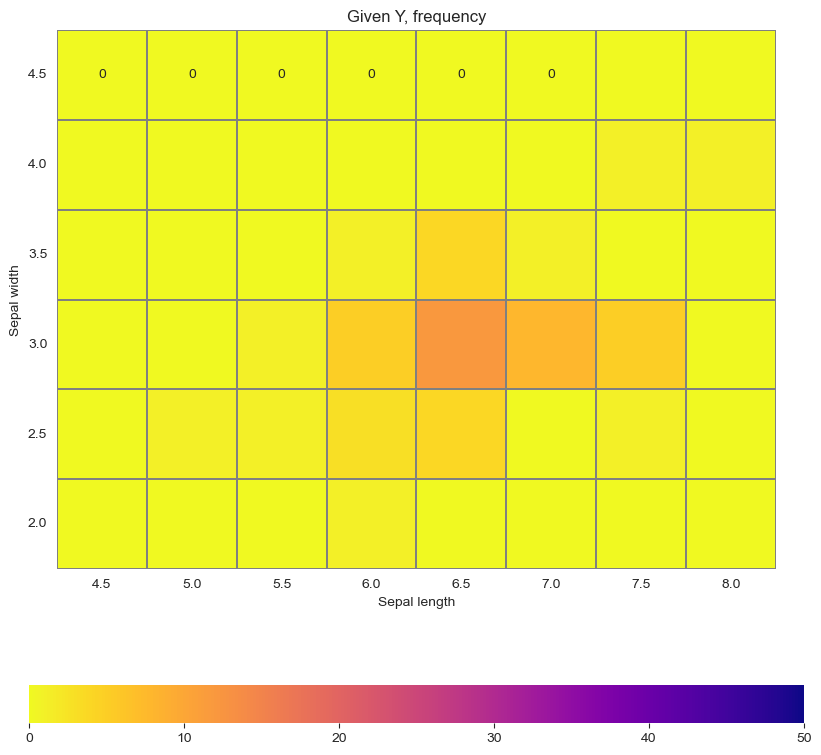

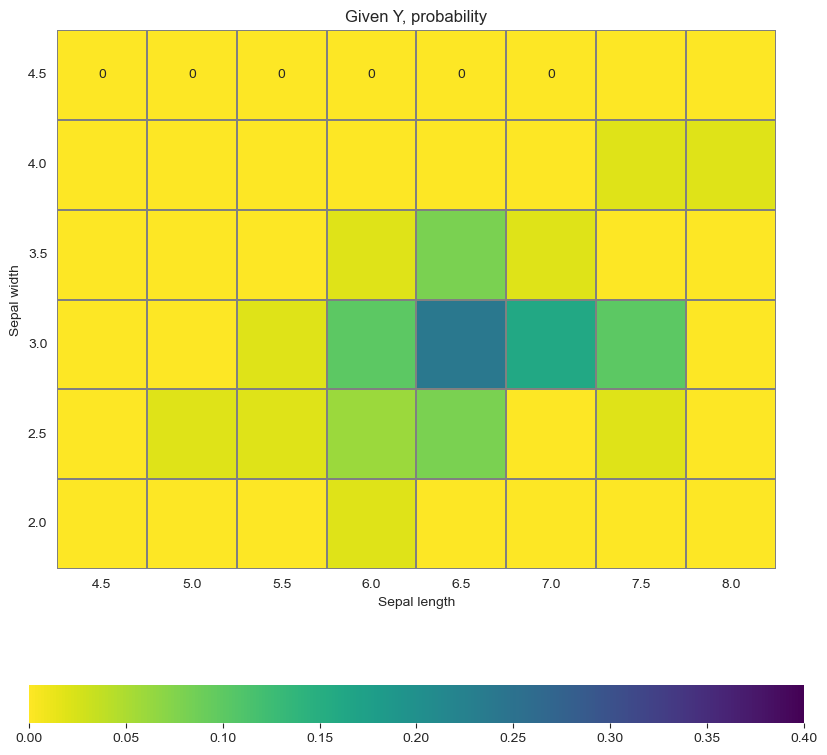

In [42]:
# joint probability of X1, X2 given Y
X_df_12_given_Y = X_df[['sepal_length', 'sepal_width', 'species']]
X_df_12_given_Y['count'] = 1

# ~ 表示取反
X_df_12_given_Y.loc[~(X_df_12_given_Y.species == Given_Y), 'count'] = np.nan

X_df_12_given_Y = X_df_12_given_Y[['sepal_length', 'sepal_width', 'count']]
print(X_df_12_given_Y)

frequency_matrix_given_Y = X_df_12_given_Y.groupby(['sepal_length', 'sepal_width']).count()
print(frequency_matrix_given_Y)
frequency_matrix_given_Y = frequency_matrix_given_Y.unstack(level=0)
print(frequency_matrix_given_Y)

# 移除频率矩阵的列级别的标签
frequency_matrix_given_Y.columns = frequency_matrix_given_Y.columns.droplevel(0)
frequency_matrix_given_Y = frequency_matrix_given_Y.fillna(0)
frequency_matrix_given_Y = frequency_matrix_given_Y.iloc[::-1]

probability_matrix_given_Y = frequency_matrix_given_Y / frequency_matrix_given_Y.sum().sum()

# frequency_matrix_given_Y.to_excel('C:\\Users\\ghdong\\Desktop\\' +
#                                   'frequency_matrix_given_' +
#                                   Given_Y + '.xlsx')

title = 'Given Y, frequency'
heatmap_sum(frequency_matrix_given_Y, sepal_width_array, sepal_length_array, title, 0, 50, 'plasma_r')

title = 'Given Y, probability'
heatmap_sum(probability_matrix_given_Y, sepal_width_array, sepal_length_array, title, 0, 0.4, 'viridis_r')



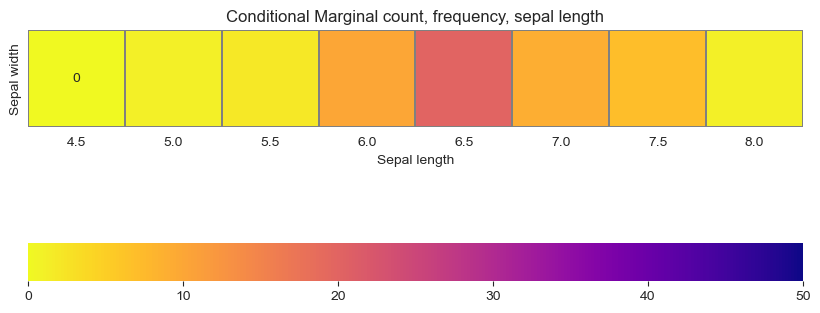

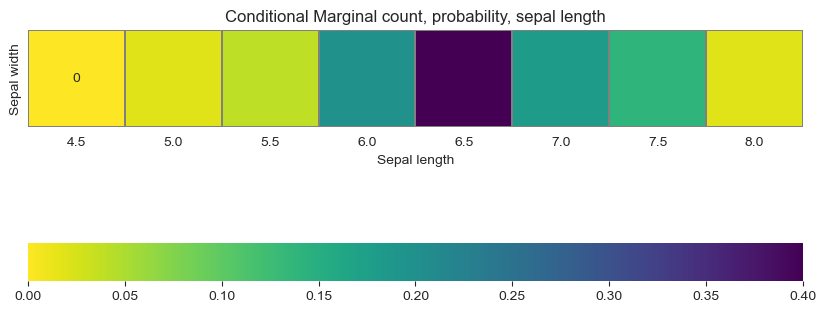

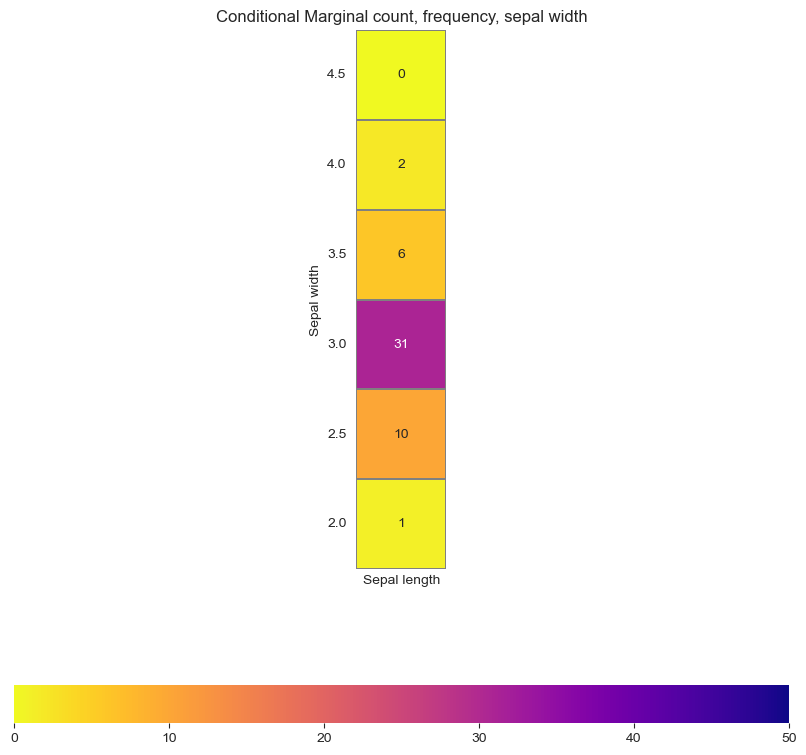

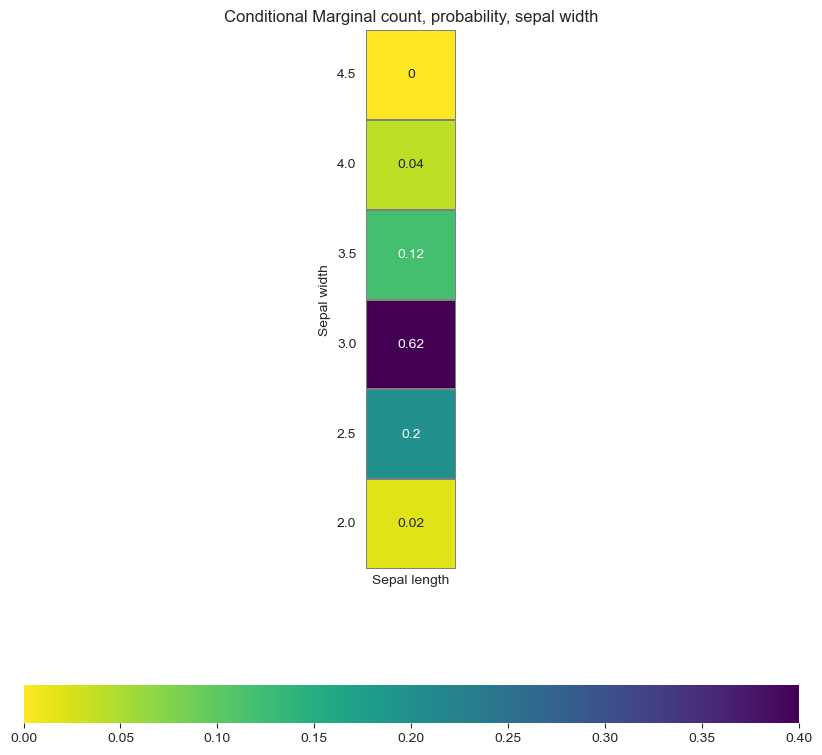

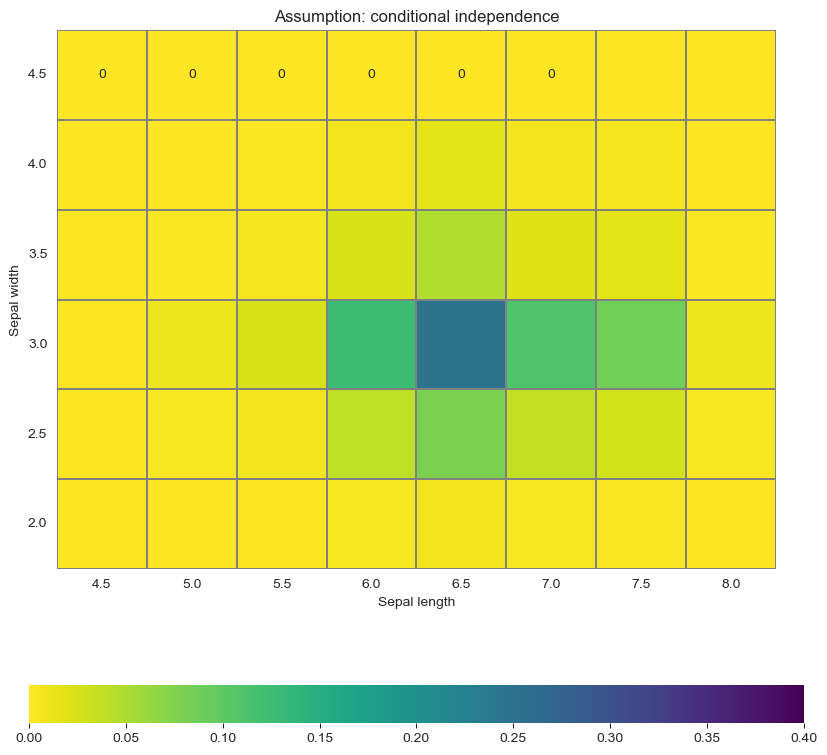

In [43]:
# Conditional Marginal, sepal length

freq_sepal_length_given_Y = frequency_matrix_given_Y.sum(axis=0).to_numpy().reshape((1, -1))
prob_sepal_length_given_Y = probability_matrix_given_Y.sum(axis=0).to_numpy().reshape((1, -1))

title = 'Conditional Marginal count, frequency, sepal length'
heatmap_sum(freq_sepal_length_given_Y, [], sepal_length_array, title, 0, 50, 'plasma_r')

title = 'Conditional Marginal count, probability, sepal length'
heatmap_sum(prob_sepal_length_given_Y, [], sepal_length_array, title, 0, 0.4, 'viridis_r')

# Conditional Marginal, sepal width

freq_sepal_width_given_Y = frequency_matrix_given_Y.sum(axis=1).to_numpy().reshape((-1, 1))
prob_sepal_width_given_Y = probability_matrix_given_Y.sum(axis=1).to_numpy().reshape((-1, 1))

title = 'Conditional Marginal count, frequency, sepal width'
heatmap_sum(freq_sepal_width_given_Y, sepal_width_array, [], title, 0, 50, 'plasma_r')

title = 'Conditional Marginal count, probability, sepal width'
heatmap_sum(prob_sepal_width_given_Y, sepal_width_array, [], title, 0, 0.4, 'viridis_r')

# conditional independence

title = 'Assumption: conditional independence'
heatmap_sum(prob_sepal_width_given_Y @ prob_sepal_length_given_Y, sepal_width_array, sepal_length_array, title, 0, 0.4,
            'viridis_r')